# Presentazione di Scikit-Learn

Esistono diverse librerie Python che forniscono solide implementazioni di una gamma di algoritmi di apprendimento automatico. Uno dei più conosciuti è Scikit-Learn , un pacchetto che fornisce versioni efficienti di un gran numero di algoritmi comuni. Scikit-Learn è caratterizzato da un'API pulita, uniforme e snella, oltre che da una documentazione online molto utile e completa. Un vantaggio di questa uniformità è che una volta compresi l'uso di base e la sintassi di Scikit-Learn per un tipo di modello, passare a un nuovo modello o algoritmo è molto semplice.

Questa sezione fornisce una panoramica dell'API Scikit-Learn; una solida comprensione di questi elementi API costituirà la base per comprendere la discussione pratica più approfondita sugli algoritmi e sugli approcci di machine learning nelle lezioni successive.

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Roman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Rappresentazione dei dati in Scikit-Learn

L'apprendimento automatico si concentra sulla creazione di modelli a partire dai dati: per questo motivo inizieremo discutendo come i dati possono essere rappresentati per essere compresi dal computer. Il modo migliore per pensare ai dati all'interno di Scikit-Learn è in termini di tabelle di dati.

### Dati come tabelle
Una tabella di base è una griglia bidimensionale di dati, in cui le righe rappresentano i singoli elementi del set di dati e le colonne rappresentano le quantità relative a ciascuno di questi elementi. Ad esempio, se consideriamo il set di dati sui fiori Iris , notoriamente analizzato da Ronald Fisher nel 1936. Possiamo scaricare questo set di dati sotto forma di Pandas DataFrame utilizzando la libreria Seaborn :

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Qui ogni riga di dati si riferisce a un singolo fiore osservato e il numero di righe è il numero totale di fiori nel set di dati. In generale, ci riferiremo alle righe della matrice come campioni e al numero di righe come `n_samples`.

Allo stesso modo, ciascuna colonna di dati fa riferimento a una particolare informazione quantitativa che descrive ciascun campione. In generale, ci riferiremo alle colonne della matrice come caratteristiche e al numero di colonne come `n_features`.

### Caratteristiche delle Matrici

Questo layout della tabella rende chiaro che le informazioni possono essere pensate come un array o matrice numerica bidimensionale, che chiameremo matrice delle caratteristiche . Per convenzione, questa matrice delle caratteristiche viene spesso memorizzata in una variabile denominata X. Si presuppone che la matrice delle caratteristiche sia bidimensionale, con forma [n_samples, n_features], ed è spesso contenuta in un array NumPy o Pandas DataFrame, sebbene alcuni modelli Scikit-Learn accettino anche matrici sparse SciPy.

I campioni (cioè le righe) si riferiscono sempre ai singoli oggetti descritti dal dataset. Ad esempio, il campione potrebbe essere un fiore, una persona, un documento, un'immagine, un file audio, un video, un oggetto astronomico o qualsiasi altra cosa che puoi descrivere con una serie di misurazioni quantitative.

Le caratteristiche (cioè le colonne) si riferiscono sempre alle distinte osservazioni che descrivono ciascun campione in modo quantitativo. Le caratteristiche hanno generalmente un valore reale, ma in alcuni casi possono avere un valore booleano o discreto.

### L'Array Target

Oltre alla matrice delle caratteristiche X, generalmente lavoriamo anche con un'etichetta o un array di destinazione , che per convenzione chiameremo y. L'array di destinazione è solitamente unidimensionale, con length n_samples, ed è generalmente contenuto in un array NumPy o Pandas Series. L'array di destinazione può avere valori numerici continui o classi/etichette discrete. Sebbene alcuni stimatori Scikit-Learn gestiscano più valori target sotto forma di un array target bidimensionale [n_samples, n_targets], lavoreremo principalmente con il caso comune di un array target unidimensionale.

Spesso un punto di confusione è il modo in cui l'array di destinazione differisce dalle altre colonne delle funzionalità. La caratteristica distintiva dell'array target è che solitamente è la quantità che vogliamo prevedere dai dati : in termini statistici, è la variabile dipendente. Ad esempio, nei dati precedenti potremmo voler costruire un modello in grado di prevedere la specie di fiore in base alle altre misurazioni; in questo caso, la colonna species verrebbe considerata l'array di destinazione.

Tenendo presente questo array di target, possiamo utilizzare Seaborn per visualizzare comodamente i dati:

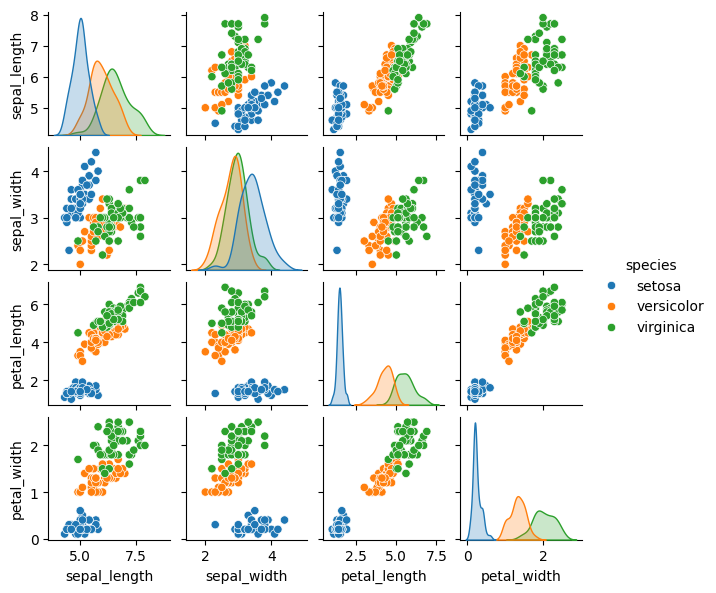

In [3]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5)

Per l'utilizzo in Scikit-Learn, estrarremo la matrice delle caratteristiche e l'array di destinazione dal file DataFrame, cosa che possiamo fare utilizzando alcune delle operazioni DataFrame di Pandas:

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

Per riassumere, la disposizione prevista delle caratteristiche e dei valori target è quella del seguente diagramma:

![](dati/img/feature%20matrix%20scikit.png)

Con questi dati opportunamente formattati, possiamo passare a considerare l' API dello stimatore di Scikit-Learn:

## The Estimator API

L'API Scikit-Learn è progettata tenendo presenti i seguenti principi guida, come delineato nel documento sull'API Scikit-Learn :

- Coerenza : tutti gli oggetti condividono un'interfaccia comune tratta da un insieme limitato di metodi, con documentazione coerente.

- Ispezione : tutti i valori dei parametri specificati vengono esposti come attributi pubblici.

- Gerarchia di oggetti limitata : solo gli algoritmi sono rappresentati da classi Python; i set di dati sono rappresentati in formati standard (array NumPy, Pandas DataFrame, matrici sparse SciPy) e i nomi dei parametri utilizzano stringhe Python standard.

- Composizione : molte attività di machine learning possono essere espresse come sequenze di algoritmi più fondamentali e Scikit-Learn ne fa uso ove possibile.

- Impostazioni predefinite ragionevoli : quando i modelli richiedono parametri specificati dall'utente, la libreria definisce un valore predefinito appropriato.

In pratica, questi principi rendono Scikit-Learn molto facile da usare, una volta compresi i principi di base. Ogni algoritmo di machine learning in Scikit-Learn viene implementato tramite l'API Estimator, che fornisce un'interfaccia coerente per un'ampia gamma di applicazioni di machine learning.

### Basi dell'API

Più comunemente, i passaggi per utilizzare l'API dello stimatore Scikit-Learn sono i seguenti:

- Scegliere una classe di modello importando la classe di stima appropriata da Scikit-Learn.
- Scegliere gli iperparametri del modello creando un'istanza di questa classe con i valori desiderati.
- Disporre i dati in una matrice delle caratteristiche e in un vettore target seguendo la discussione sopra.
- Adattare il modello ai dati chiamando il fit() metodo dell'istanza del modello.
- Applicare il modello a nuovi dati:
   - Per l'apprendimento supervisionato, spesso prevediamo etichette per dati sconosciuti utilizzando il predict() metodo.
   - Per l'apprendimento non supervisionato, spesso trasformiamo o deduciamo le proprietà dei dati utilizzando il metodo transform() o predict().

### Esempio di apprendimento supervisionato: regressione lineare semplice

Come esempio di questo processo, consideriamo una semplice regressione lineare, ovvero il caso comune di adattare una linea a X. Utilizzeremo i seguenti semplici dati per il nostro esempio di regressione:

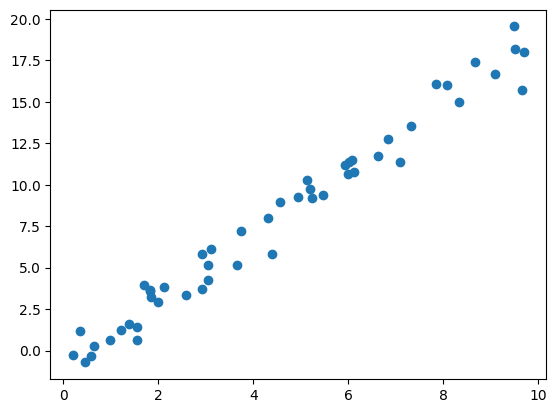

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

Con questi dati a disposizione, possiamo utilizzare la ricetta delineata in precedenza. Esaminiamo il processo:

#### 1. Scegliamo una classe di modello

In Scikit-Learn, ogni classe del modello è rappresentata da una classe Python. 
Quindi, ad esempio, se desideriamo calcolare un semplice modello di regressione lineare, possiamo importare la classe di regressione lineare:

In [7]:
from sklearn.linear_model import LinearRegression

#### 2. Scegliamo gli iperparametri del modello

Un punto importante è che una classe di modello non è la stessa cosa di un'istanza di un modello .

Una volta decisa la classe del nostro modello, ci sono ancora alcune opzioni aperte. A seconda della classe del modello con cui stiamo lavorando, potremmo dover rispondere a una o più domande come le seguenti:

- Vogliamo adattarci all'offset (cioè, intercetta y )?
- Vogliamo che il modello sia normalizzato?
- Vogliamo preelaborare le nostre funzionalità per aggiungere flessibilità al modello?
- Quale grado di regolarizzazione vogliamo utilizzare nel nostro modello?
- Quanti componenti del modello vogliamo utilizzare?

Questi sono esempi delle scelte importanti che devono essere fatte una volta selezionata la classe del modello . Queste scelte sono spesso rappresentate come iperparametri o parametri che devono essere impostati prima che il modello sia adatto ai dati. In Scikit-Learn, gli iperparametri vengono scelti passando i valori durante l'istanziazione del modello.

Per il nostro esempio di regressione lineare, possiamo istanziare la classe  LinearRegression e specificare che vorremmo adattare l'intercetta utilizzando l'iperparametro fit_intercept:

In [8]:
model = LinearRegression(fit_intercept=True)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Tenete presente che quando viene istanziato il modello, l'unica azione è la memorizzazione di questi valori di iperparametri. In particolare, non abbiamo ancora applicato il modello a nessun dato: l'API Scikit-Learn rende molto chiara la distinzione tra scelta del modello e applicazione del modello ai dati .

#### 3. Disporre i dati in una matrice delle caratteristiche e in un vettore target

In precedenza abbiamo dettagliato la rappresentazione dei dati Scikit-Learn, che richiede una matrice di caratteristiche bidimensionali e un array di destinazione unidimensionale. Qui la nostra variabile target y è già nella forma corretta (un n_samples array di lunghezze), ma dobbiamo adattare i dati x per renderli una matrice di dimensione [n_samples, n_features]. In questo caso, ciò equivale a un semplice rimodellamento dell'array unidimensionale:

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Adattare il modello ai dati

Ora è il momento di applicare il nostro modello ai dati. Questo può essere fatto con il metodo fit() del modello:

In [10]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Questo comando fit() provoca l'esecuzione di una serie di calcoli interni dipendenti dal modello e i risultati di questi calcoli vengono archiviati in attributi specifici del modello che l'utente può esplorare. In Scikit-Learn, per convenzione tutti i parametri del modello appresi durante il fit() processo hanno un carattere di sottolineatura finale; ad esempio in questo modello lineare, abbiamo quanto segue:

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

np.float64(-0.903310725531111)

Questi due parametri rappresentano la pendenza e l'intercetta dell'adattamento lineare semplice ai dati. Confrontando la definizione dei dati, vediamo che sono molto vicini alla pendenza di input di 2 e all'intercetta di -1.

Una domanda che emerge frequentemente riguarda l’incertezza in tali parametri del modello interno. In generale, Scikit-Learn non fornisce strumenti per trarre conclusioni dai parametri interni del modello stesso: l'interpretazione dei parametri del modello è molto più una questione di modellazione statistica che una questione di apprendimento automatico . L’apprendimento automatico si concentra piuttosto su ciò che prevede il modello. 

### 5. Prevedere le etichette per dati sconosciuti

Una volta addestrato il modello, il compito principale dell'apprendimento automatico supervisionato è valutarlo in base a ciò che dice sui nuovi dati che non facevano parte del set di addestramento. In Scikit-Learn, questo può essere fatto utilizzando il metodo predict(). Ai fini di questo esempio, i nostri "nuovi dati" saranno una griglia di valori x e chiederemo quali valori y prevede il modello:

In [13]:
xfit = np.linspace(-1, 11)

Come prima, dobbiamo forzare questi valori x in una [n_samples, n_features] matrice di caratteristiche, dopo di che possiamo inserirli nel modello:

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Infine, visualizziamo i risultati tracciando prima i dati grezzi e poi adattando questo modello:

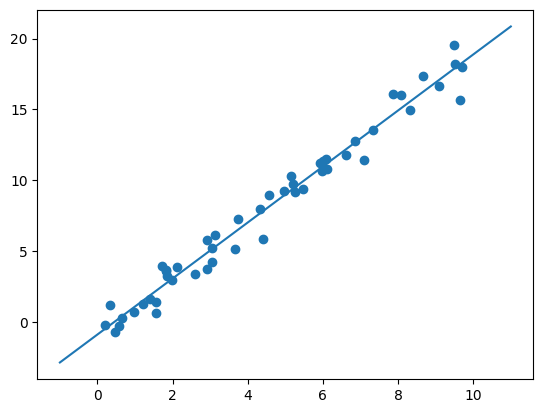

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

In [16]:
# 1. Importare le librerie necessarie
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [17]:
# 2. Caricare il dataset Iris
iris = load_iris()
X = iris.data # Caratteristiche
y = iris.target  # Etichette

print("Prime 5 righe delle caratteristiche (X):")
print(pd.DataFrame(X, columns=iris.feature_names).head())
print("\nPrime 5 etichette (y):")
print(y[:5])

Prime 5 righe delle caratteristiche (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Prime 5 etichette (y):
[0 0 0 0 0]


In [18]:
# 3. Dividere i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nDimensione del set di addestramento (X_train): {X_train.shape}")
print(f"Dimensione del set di test (X_test): {X_test.shape}")


Dimensione del set di addestramento (X_train): (105, 4)
Dimensione del set di test (X_test): (45, 4)


In [19]:
# 4. Inizializzare e addestrare il modello (Albero Decisionale)
model = DecisionTreeClassifier(random_state=42) # Crea un'istanza del modello
model.fit(X_train, y_train) # Addestra il modello sui dati di addestramento

print("\nModello addestrato con successo!")


Modello addestrato con successo!


In [20]:
# 5. Effettuare previsioni sul set di test
y_pred = model.predict(X_test)

print(f"\nPrevisioni del modello sulle prime 5 istanze di test: {y_pred[:5]}")
print(f"Etichette reali delle prime 5 istanze di test:     {y_test[:5]}")



Previsioni del modello sulle prime 5 istanze di test: [1 0 2 1 1]
Etichette reali delle prime 5 istanze di test:     [1 0 2 1 1]


In [21]:
# 6. Valutare l'accuratezza del modello
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuratezza del modello: {accuracy:.2f}") # Formattato a 2 cifre decimali



Accuratezza del modello: 1.00


In [22]:
# 1. Importare le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt # Per visualizzare i dati
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Useremo la Regressione Lineare
from sklearn.metrics import mean_squared_error, r2_score

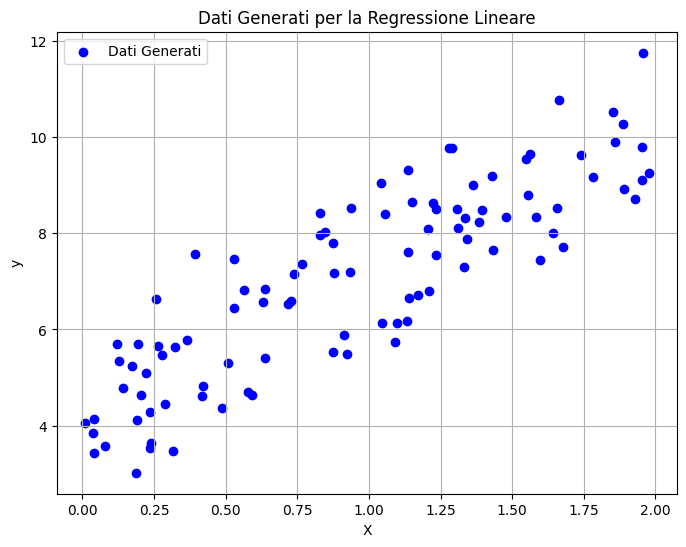

In [23]:
# 2. Generare un dataset semplice
# Creiamo 100 punti dati casuali con una relazione lineare e un po' di rumore
np.random.seed(0) # Per riproducibilità
X = 2 * np.random.rand(100, 1) # 100 valori casuali tra 0 e 2
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3*X + rumore

# Visualizziamo i dati (opzionale)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Dati Generati')
plt.title('Dati Generati per la Regressione Lineare')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# 3. Dividere i dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# 4. Inizializzare e addestrare il modello (Regressione Lineare)
model = LinearRegression() # Crea un'istanza del modello
model.fit(X_train, y_train) # Addestra il modello

print("\nModello di Regressione Lineare addestrato con successo!")

# Stampa i coefficienti (pendenza e intercetta) del modello lineare appreso
print(f"Coefficiente (pendenza): {model.coef_[0][0]:.2f}")
print(f"Intercetta: {model.intercept_[0]:.2f}")


Modello di Regressione Lineare addestrato con successo!
Coefficiente (pendenza): 3.03
Intercetta: 4.18


In [26]:
# 5. Effettuare previsioni sul set di test
y_pred = model.predict(X_test)
y_pred

array([[ 8.36504179],
       [ 4.79277937],
       [10.08325047],
       [ 8.23293803],
       [ 8.20951638],
       [ 8.30059508],
       [ 6.96746628],
       [ 6.09927131],
       [ 8.96555174],
       [ 7.49586405],
       [ 8.88345953],
       [ 5.77601849],
       [ 7.83487457],
       [ 7.61457363],
       [ 6.10281541],
       [ 6.73861633],
       [ 5.88644464],
       [ 4.90260291],
       [ 7.61221772],
       [ 8.85972383],
       [ 5.15134864],
       [ 7.6600268 ],
       [ 5.04270805],
       [ 8.39625576],
       [ 4.75680185],
       [ 4.70253605],
       [ 6.35050834],
       [ 7.72395693],
       [ 6.49531391],
       [10.08507538]])


Errore Quadratico Medio (MSE): 0.78
Coefficiente di Determinazione (R^2): 0.72


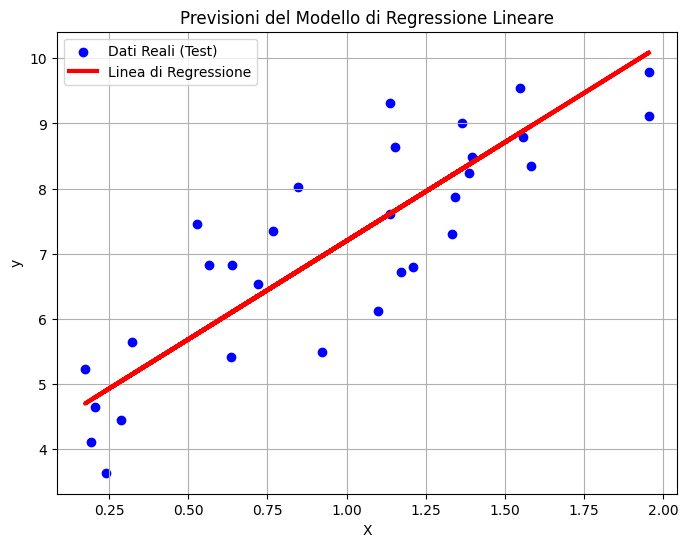

In [27]:
# 6. Valutare il modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nErrore Quadratico Medio (MSE): {mse:.2f}")
print(f"Coefficiente di Determinazione (R^2): {r2:.2f}")

# Visualizzare la linea di regressione sul set di test (opzionale)
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Dati Reali (Test)')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linea di Regressione')
plt.title('Previsioni del Modello di Regressione Lineare')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()